# Worksheet 10

Name:  Mao Mao 
UID: U02043894

### Topics

- Singular Value Decomposition

#### Feature Extraction

SVD finds features that are orthogonal. The Singular Values correspond to the importance of the feature or how much variance in the data it captures.

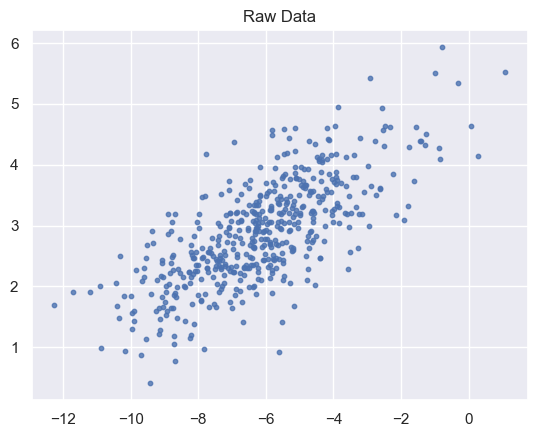

In [17]:
import numpy as np
import matplotlib.pyplot as plt

n_samples = 500
C = np.array([[0.1, 0.6], [2., .6]])
X = np.random.randn(n_samples, 2) @ C + np.array([-6, 3])
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Raw Data")
plt.show()

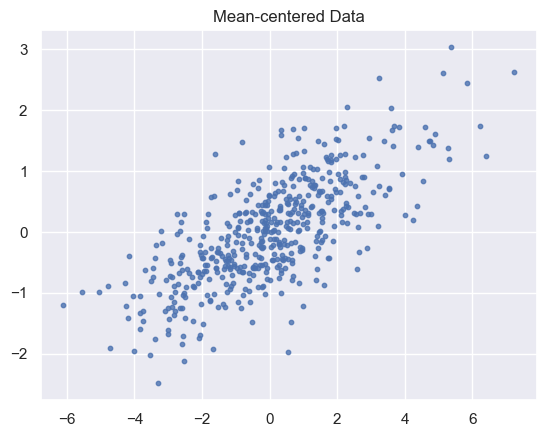

In [18]:
X = X - np.mean(X, axis=0)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Mean-centered Data")
plt.show()

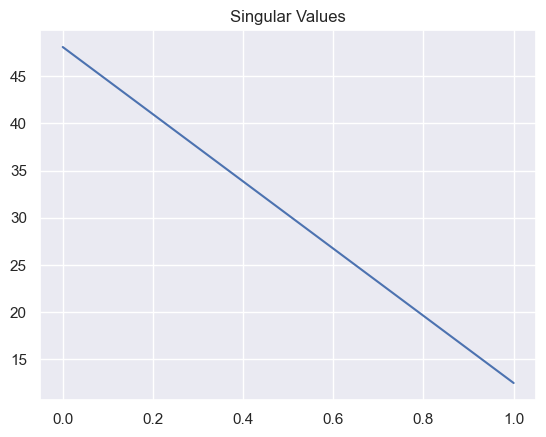

In [19]:
u,s,vt=np.linalg.svd(X, full_matrices=False)
plt.plot(s) # only 2 singular values
plt.title("Singular Values")
plt.show()

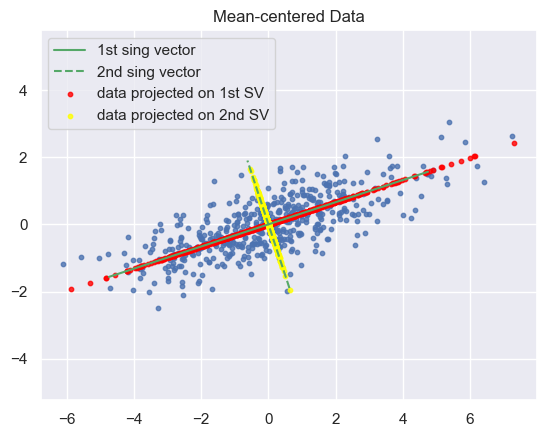

In [20]:
scopy0 = s.copy()
scopy1 = s.copy()
scopy0[1:] = 0.0
scopy1[:1] = 0.0
approx0 = u.dot(np.diag(scopy0)).dot(vt)
approx1 = u.dot(np.diag(scopy1)).dot(vt)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
sv1 = np.array([[-5],[5]]) @ vt[[0],:]
sv2 = np.array([[-2],[2]]) @ vt[[1],:]
plt.plot(sv1[:,0], sv1[:,1], 'g-', label="1st sing vector")
plt.plot(sv2[:,0], sv2[:,1], 'g--', label="2nd sing vector")
plt.scatter(approx0[:, 0] , approx0[:, 1], s=10, alpha=0.8, color="red", label="data projected on 1st SV")
plt.scatter(approx1[:, 0] , approx1[:, 1], s=10, alpha=0.8, color="yellow", label="data projected on 2nd SV")
plt.axis('equal')
plt.legend()
plt.title("Mean-centered Data")
plt.show()


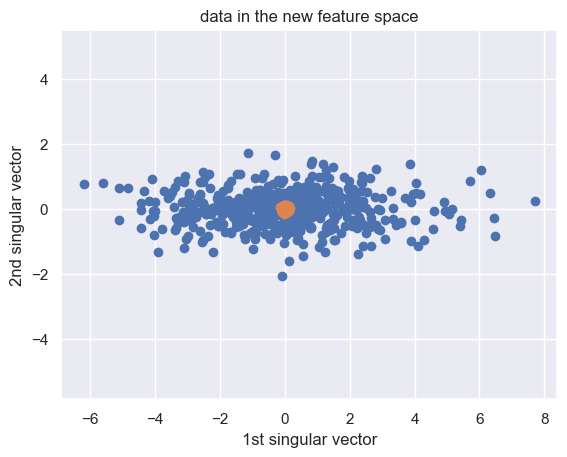

In [21]:
# show ouput from svd is the same
orthonormal_X = u
shifted_X = u.dot(np.diag(s))
plt.axis('equal')
plt.scatter(shifted_X[:,0], shifted_X[:,1])
plt.scatter(orthonormal_X[:,0], orthonormal_X[:,1])
plt.xlabel("1st singular vector")
plt.ylabel("2nd singular vector")
plt.title("data in the new feature space")
plt.show()

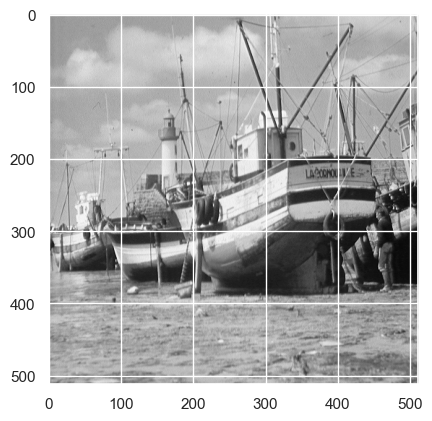

In [22]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

boat = np.loadtxt('./boat.dat')
plt.figure()
plt.imshow(boat, cmap = cm.Greys_r)

a) Plot the singular values of the image above (note: a gray scale image is just a matrix).

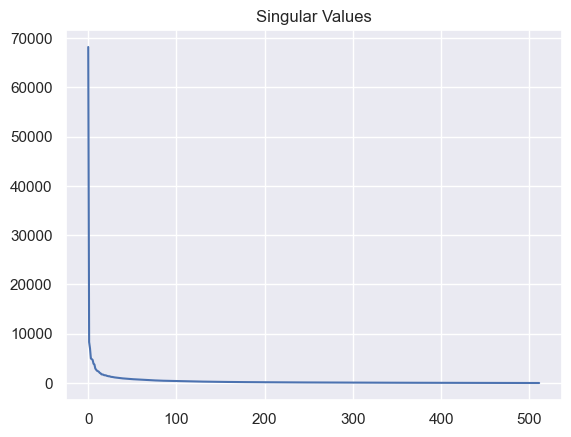

In [23]:
u,s,vt=np.linalg.svd(boat,full_matrices=False)
plt.plot(s) # two singular values
plt.title("Singular Values")
plt.show()

Notice you can get the image back by multiplying the matrices back together:

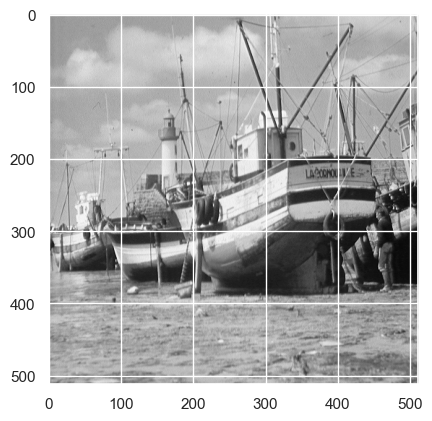

In [24]:
boat_copy = u.dot(np.diag(s)).dot(vt)
plt.figure()
plt.imshow(boat_copy, cmap = cm.Greys_r)

b) Create a new matrix `scopy` which is a copy of `s` with all but the first singular value set to 0.

In [25]:
scopy = s.copy()
scopy[1:] = 0.0

c) Create an approximation of the boat image by multiplying `u`, `scopy`, and `v` transpose. Plot them side by side.

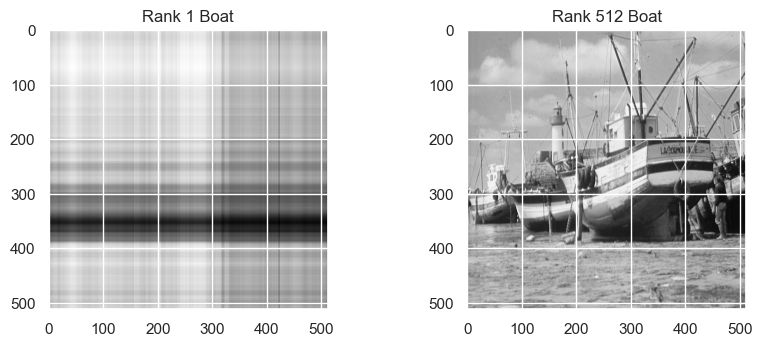

In [26]:
boat_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 1 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

d) Repeat c) with 40 singular values instead of just 1.

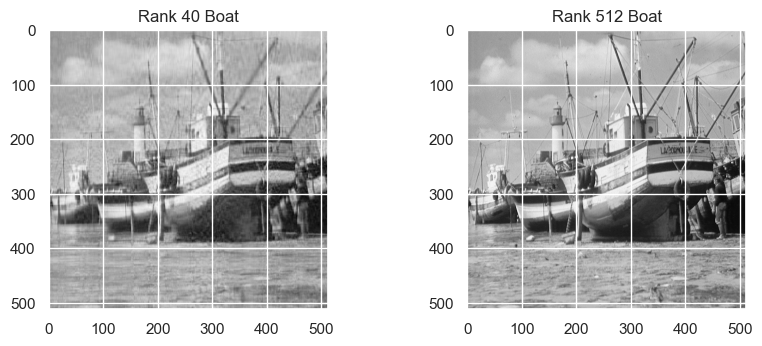

In [27]:
scopy_1 = s.copy()
scopy_1[40:] = 0.0

boat_app =  u.dot(np.diag(scopy_1)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 40 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

### Why you should care

a) By using an approximation of the data, you can improve the performance of classification tasks since:

1. there is less noise interfering with classification
2. no relationship between features after SVD
3. the algorithm is sped up when reducing the dimension of the dataset

Below is some code to perform facial recognition on a dataset. Notice that, applied blindly, it does not perform well:

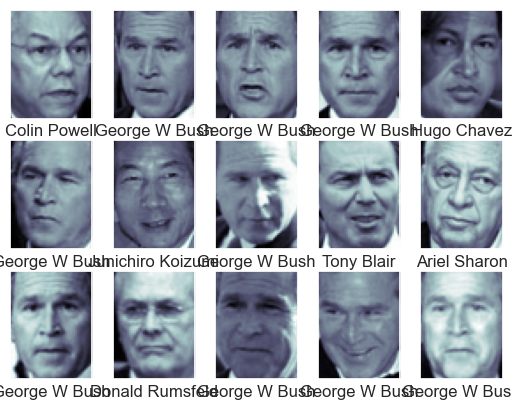

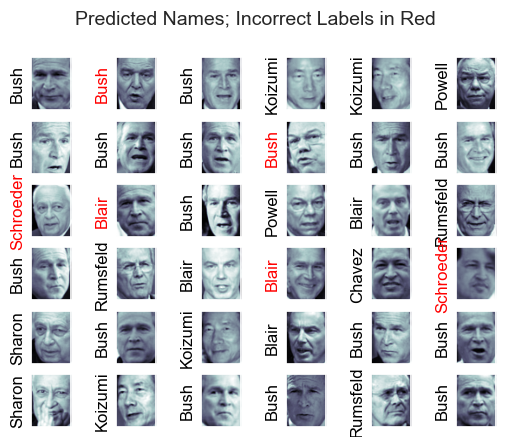

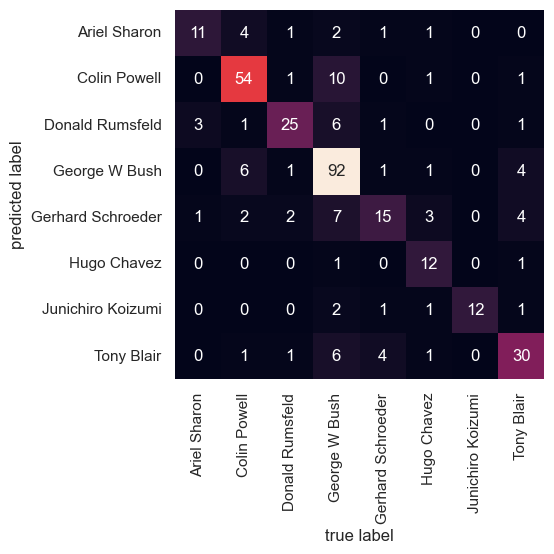

Accuracy =  0.744807121661721


In [28]:
import numpy as np
from PIL import Image
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

sns.set()

# Get face data
faces = fetch_lfw_people(min_faces_per_person=60)

# plot face data
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show()

# split train test set
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

# blindly fit svm
svc = SVC(kernel='rbf', class_weight='balanced', C=5, gamma=0.001)

# fit model
model = svc.fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

fig, ax = plt.subplots(6, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

print("Accuracy = ", accuracy_score(ytest, yfit))

By performing SVD before applying the classification tool, we can reduce the dimension of the dataset.

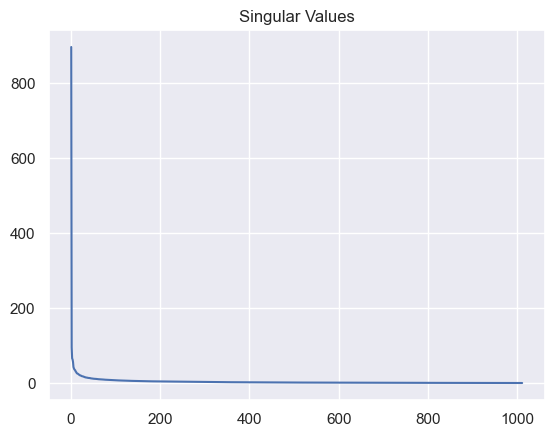

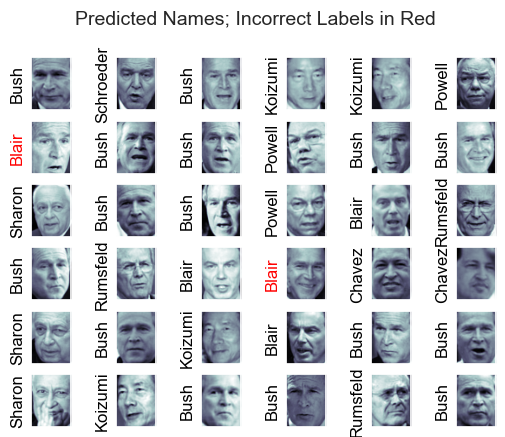

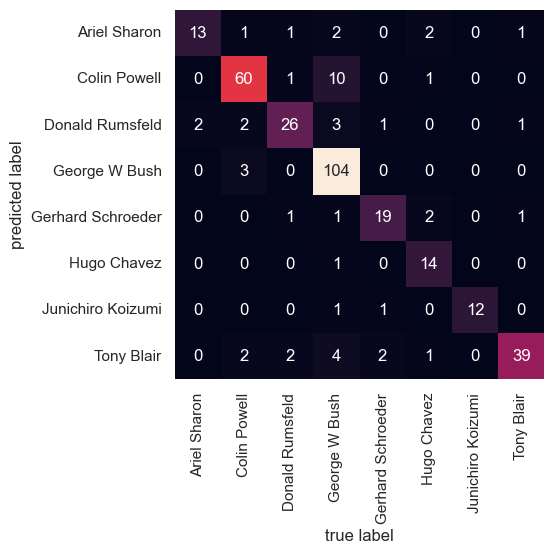

Accuracy =  0.8516320474777448


In [29]:
# look at singular values
_, s, _ = np.linalg.svd(Xtrain, full_matrices=False)
plt.plot(range(1,len(s)+1),s)
plt.title("Singular Values")
plt.show()

# extract principal components
pca = PCA(n_components=150, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced', C=5, gamma=0.001)
svcpca = make_pipeline(pca, svc)
model = svcpca.fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

fig, ax = plt.subplots(6, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

print("Accuracy = ", accuracy_score(ytest, yfit))

Similar to finding k in K-means, we're trying to find the point of diminishing returns when picking the number of singular vectors (also called principal components).

b) SVD can be used for anomaly detection.

The data below consists of the number of 'Likes' during a six month period, for each of 9000 users across the 210 content categories that Facebook assigns to pages.

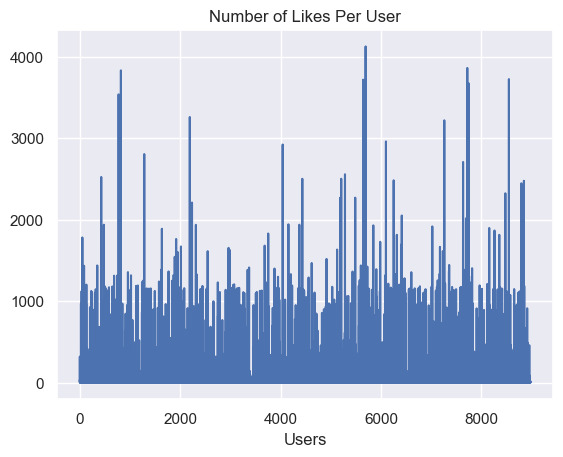

In [30]:
data = np.loadtxt('spatial_data.txt')

FBSpatial = data[:,1:]
FBSnorm = np.linalg.norm(FBSpatial,axis=1,ord=1)
plt.plot(FBSnorm)
plt.title('Number of Likes Per User')
_ = plt.xlabel('Users')
plt.show()

How users distribute likes across categories follows a general pattern that most users follow. This behavior can be captured using few singular vectors. And anomalous users can be easily identified.

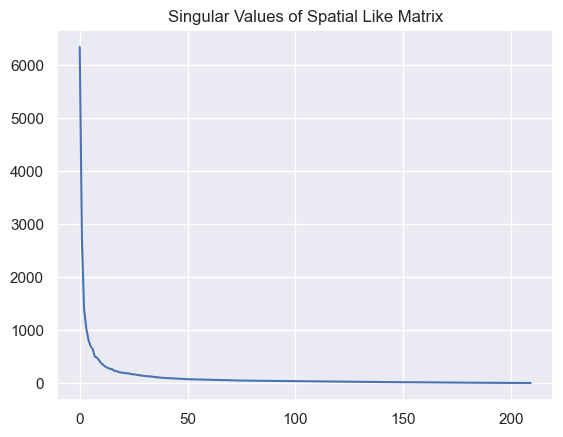

In [31]:
u,s,vt = np.linalg.svd(FBSpatial,full_matrices=False)
plt.plot(s)
_ = plt.title('Singular Values of Spatial Like Matrix')
plt.show()

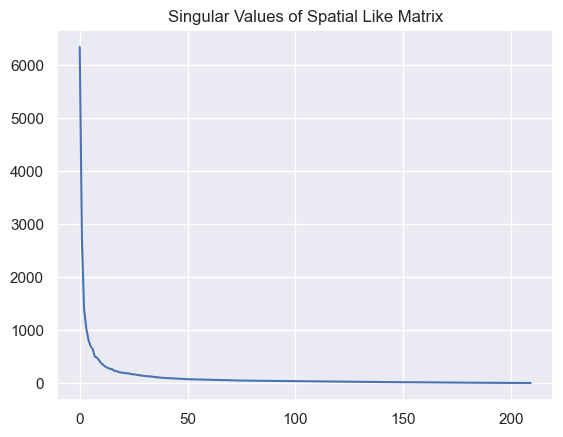

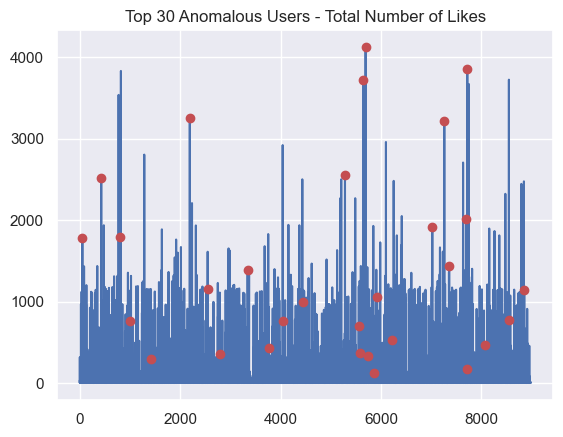

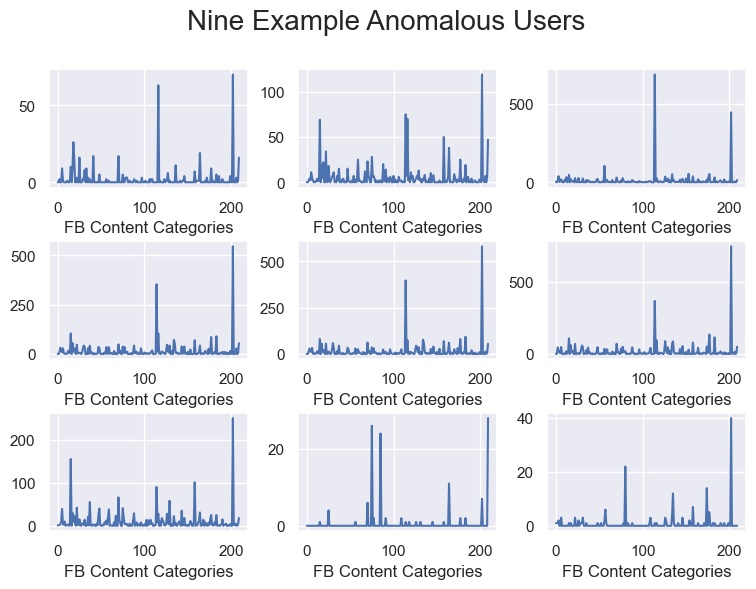

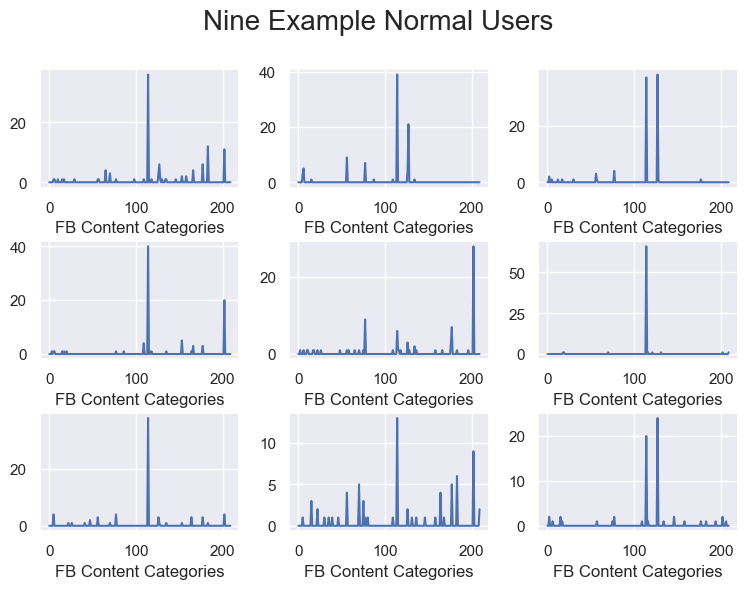

In [32]:
u,s,vt = np.linalg.svd(FBSpatial,full_matrices=False)
plt.plot(s)
_ = plt.title('Singular Values of Spatial Like Matrix')
plt.show()

RANK = 50
scopy = s.copy()
scopy[RANK:] = 0.
N = u @ np.diag(scopy) @ vt
O = FBSpatial - N
Onorm = np.linalg.norm(O, axis=1)
anomSet = np.argsort(Onorm)[-30:]
# plt.plot(Onorm)
# plt.plot(anomSet, Onorm[anomSet],'ro')
# _ = plt.title('Norm of Residual (rows of O)')
# plt.show()

plt.plot(FBSnorm)
plt.plot(anomSet, FBSnorm[anomSet],'ro')
_ = plt.title('Top 30 Anomalous Users - Total Number of Likes')
plt.show()

# anomalous users
plt.figure(figsize=(9,6))
for i in range(1,10):
    ax = plt.subplot(3,3,i)
    plt.plot(FBSpatial[anomSet[i-1],:])
    plt.xlabel('FB Content Categories')
plt.subplots_adjust(wspace=0.25,hspace=0.45)
_ = plt.suptitle('Nine Example Anomalous Users',size=20)
plt.show()

# normal users
set = np.argsort(Onorm)[0:7000]
# that have high overall volume
max = np.argsort(FBSnorm[set])[::-1]
plt.figure(figsize=(9,6))
for i in range(1,10):
    ax = plt.subplot(3,3,i)
    plt.plot(FBSpatial[set[max[i-1]],:])
    plt.xlabel('FB Content Categories')
plt.subplots_adjust(wspace=0.25,hspace=0.45)
_ = plt.suptitle('Nine Example Normal Users',size=20)
plt.show()

## Challenge Problem

a) Fetch the "mnist_784" data. Pick an image of a digit at random and plot it.


picked 15 random data points
picked 15 random data points
picked 15 random data points
picked 15 random data points
picked 15 random data points
picked 15 random data points
picked 15 random data points
picked 15 random data points
picked 15 random data points
picked 15 random data points
picked 15 random data points
picked 15 random data points
picked 15 random data points
picked 15 random data points
picked 15 random data points


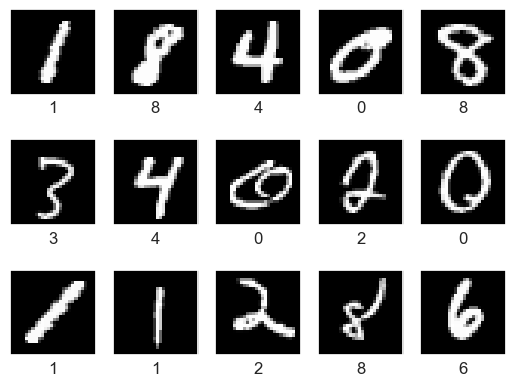

In [49]:
import matplotlib.pyplot as plt
import random
from sklearn.datasets import fetch_openml

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)


# your code here
print()
fig, ax = plt.subplots(3, 5) # 15 random images
for i, axi in enumerate(ax.flat):
    rand_img_id = random.randint(0, len(X))
    axi.imshow(X[rand_img_id].reshape(28, 28), cmap = 'gray')
    axi.set(xticks=[], yticks=[],
            xlabel=y[rand_img_id])
plt.show()

print("picked 15 random data points")

b) Plot its singular value plot.

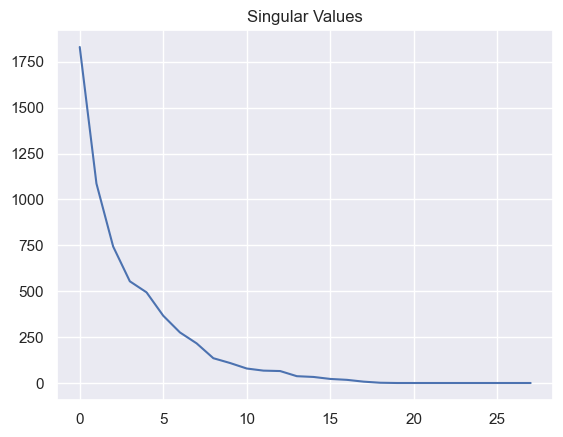

In [50]:
u,s,vt=np.linalg.svd(X[0].reshape(28, 28),full_matrices=False)
plt.plot(s) # two singular values
plt.title("Singular Values")
plt.show()

c) By setting some singular values to 0, plot the approximation of the image next to the original image

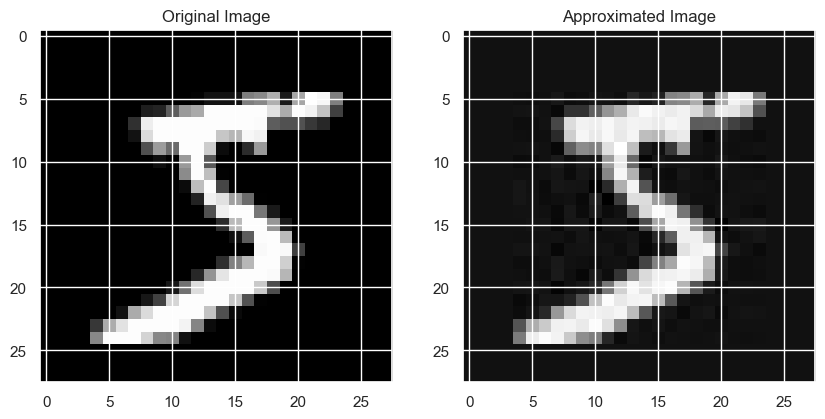

In [51]:
# Set some singular values to 0 to approximate the image
s_approx = s.copy()
s_approx[10:] = 0  # Setting all but the first 10 singular values to 0

# Reconstruct the image with the approximated singular values
reconstructed_img = np.dot(u * s_approx, vt)

# Plot the original and approximated images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axs[0].imshow(X[0].reshape(28, 28), cmap='gray')
axs[0].title.set_text('Original Image')

# Approximated image
axs[1].imshow(reconstructed_img, cmap='gray')
axs[1].title.set_text('Approximated Image')

plt.show()

d) Consider the entire dataset as a matrix. Perform SVD and explain why / how you chose a particular rank. Note: you may not be able to run this on the entire dataset in a reasonable amount of time so you may take a small random sample for this and the following questions.

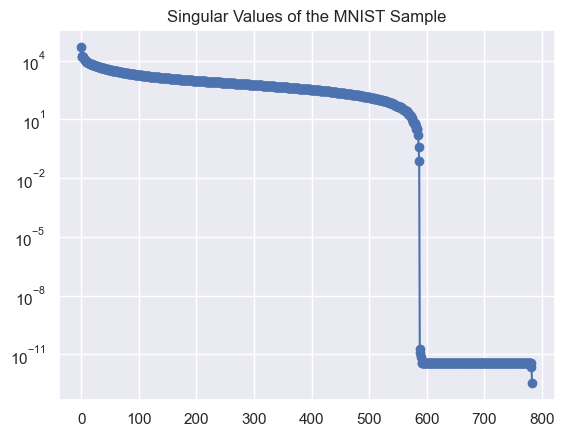

In [52]:
import numpy as np
# Pick random 1000 samples
sample_indices = np.random.choice(X.shape[0], size=1000, replace=False)
X_sample = X[sample_indices]
U, S, VT = np.linalg.svd(X_sample, full_matrices=False)
plt.plot(S, marker='o')
plt.yscale('log')  # Log scale may help in visualizing the drop-off more clearly
plt.title('Singular Values of the MNIST Sample')
plt.show()

My choice of rank for approximation based on the point at which the singular values start to level off or drop significantly. It means the remaining components contribute less to the structure of the data. My choice of rank is according to the following calculation.

In [53]:
# Calculate the total area under the curve using the sum of squares of singular values
total_area = np.sum(S**2)

# Calculate the cumulative sum of squares of singular values
cumulative_sum = np.cumsum(S**2)

# Find the index where the cumulative sum reaches 90% of the total area
threshold = 0.9 * total_area
rank_index = np.where(cumulative_sum >= threshold)[0][0]  # Get the first index that crosses the threshold

rank_index, cumulative_sum[rank_index], threshold

(49, 5107473278.808407, 5102425935.899994)

e) Using Kmeans on this new dataset, cluster the images from d) using 10 clusters and plot the centroid of each cluster. Note: the centroids should be represented as images.

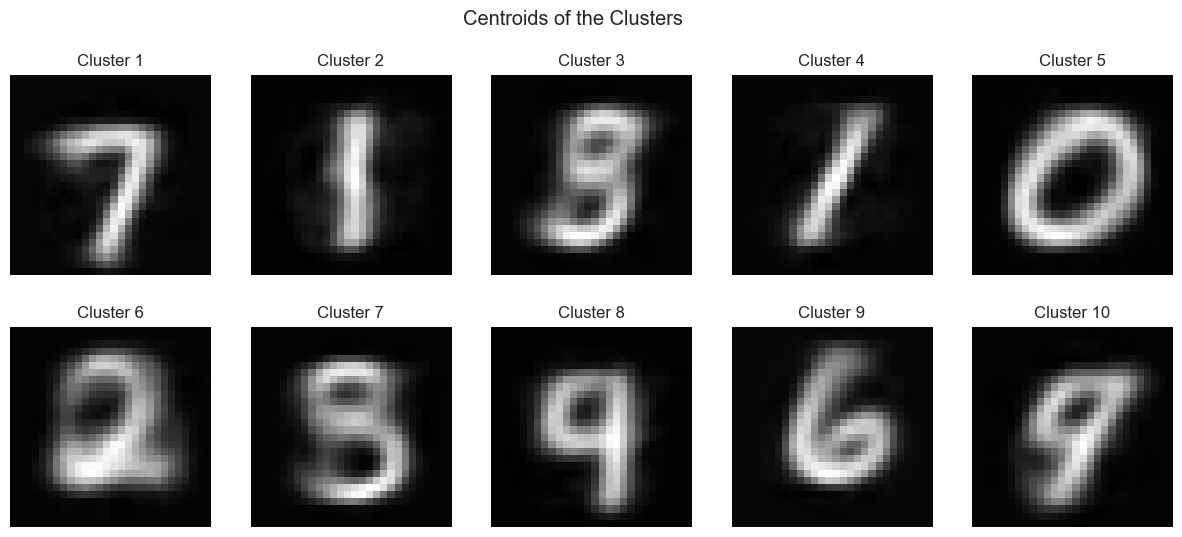

In [59]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

# Assuming the rank to choose is 50 based on previous discussions
rank = 50
X_reduced = np.dot(X_sample, VT[:rank, :].T)

# Apply KMeans clustering on the reduced dataset
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_reduced)

# Retrieve the centroids
centroids = kmeans.cluster_centers_

# Project centroids back to original space
centroids_original_space = np.dot(centroids, VT[:rank, :])

# Plot the centroids as images
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axs.flat):
    ax.imshow(centroids_original_space[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Cluster {i+1}')
plt.suptitle('Centroids of the Clusters')
plt.show()


# kmeans = KMeans(n_clusters=..., init='k-means++')
# kmeans.fit_predict(...)

f) Repeat e) on the original dataset (if you used a subset of the dataset, keep using that same subset). Comment on any differences (or lack thereof) you observe between the centroids created here vs the ones you created in e).

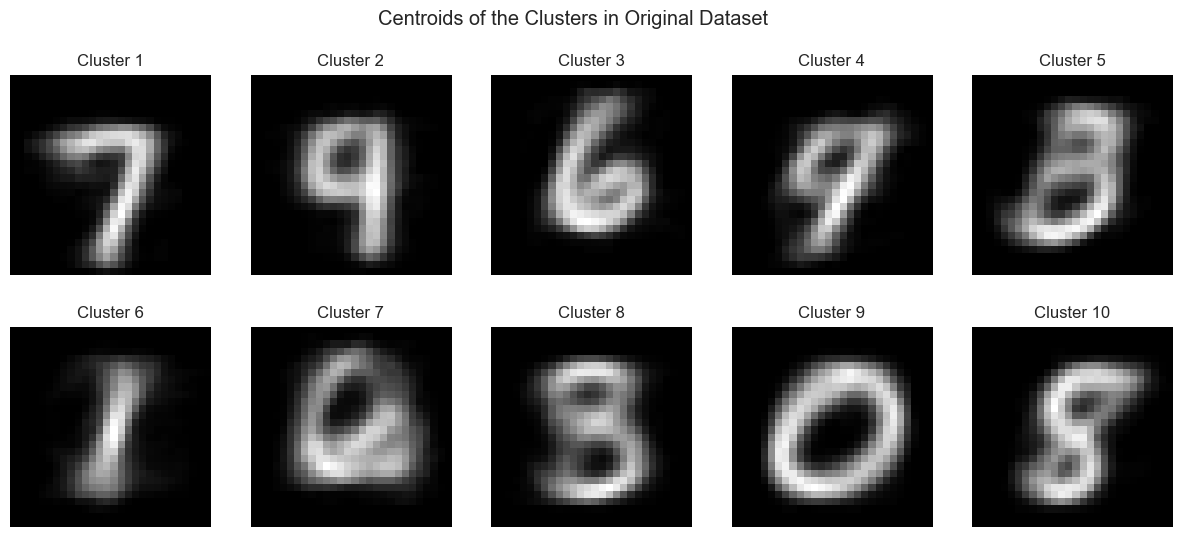

In [60]:
kmeans_original = KMeans(n_clusters=10, random_state=42)
kmeans_original.fit(X_sample)  # Assuming X_sample is the subset of the original dataset
centroids_original = kmeans_original.cluster_centers_
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axs.flat):
    ax.imshow(centroids_original[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Cluster {i+1}')
plt.suptitle('Centroids of the Clusters in Original Dataset')
plt.show()

Centroids from the original dataset are slightly more detailed. I think that's because they are not subject to the information loss that is caused by dimensionality reduction.

g) Create a matrix (let's call it `O`) that is the difference between the original dataset and the rank-10 approximation of the dataset. i.e. if the original dataset is `A` and the rank-10 approximation is `B`, then `O = A - B`

In [57]:
rank = 10
S10 = np.diag(S[:rank])  # Construct a diagonal matrix with the top 10 singular values
B = np.dot(U[:, :rank], np.dot(S10, VT[:rank, :]))  # Rank-10 approximation of X_sample
O = X_sample - B  # Difference matrix
print(O)

[[-4.34155540e-14  1.84692099e-12  8.07303160e-13 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.99780090e-14  1.48999260e-12  8.20337646e-13 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.17512593e-15  1.24455423e-12 -2.78995061e-13 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-1.88982905e-15  1.61297040e-12 -3.10804450e-14 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.80780309e-15  7.49293895e-13  2.51239820e-14 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.96451650e-15  6.57261834e-13 -7.94779694e-14 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


h) The largest (using euclidean distance from the origin) rows of the matrix `O` could be considered anomalous data points. Briefly explain why. Plot the 10 images (by finding them in the original dataset) responsible for the 10 largest rows of that matrix `O`.

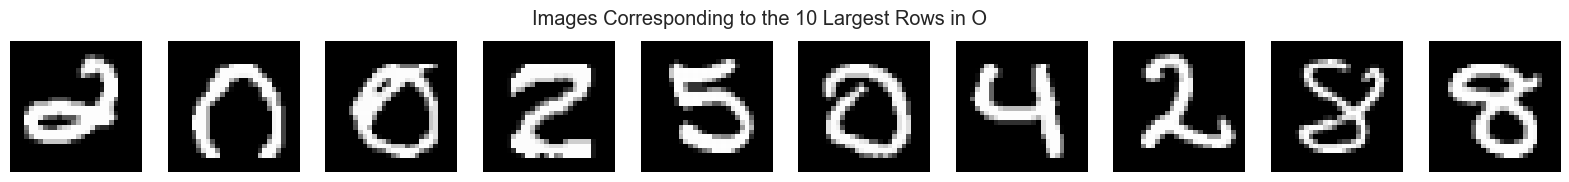

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the Euclidean norm of each row in O
norms = np.linalg.norm(O, axis=1)

# Find the indices of the 10 largest norms
largest_indices = np.argsort(norms)[-10:]

# Plot the 10 images corresponding to these indices from the original dataset
fig, axs = plt.subplots(1, 10, figsize=(20, 2))
for i, ax in enumerate(axs):
    ax.imshow(X_sample[largest_indices[i]].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.suptitle('Images Corresponding to the 10 Largest Rows in O')
plt.show()


The Euclidean distance (or L2 norm) of the largest rows in the matrix O from the origin is the magnitude of the difference between the original data point and its approximation. The largest norms are suggesting a greater discrepanc, therefore they could be considered as amomalous data points.